# **Bioconductor**

In [2]:
!pip install biopython
!pip install matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.0 MB/s eta 0:00:00


🧱 Core Concepts in Bioinformatics

| Area                             | Description                                                                              |
| -------------------------------- | ---------------------------------------------------------------------------------------- |
| 🔡 **Sequence Analysis**         | Working with DNA, RNA, and protein sequences: alignment, motif finding, GC content, etc. |
| 🧬 **Genomics**                  | Study of entire genomes, including gene prediction and genome assembly.                  |
| 💬 **Transcriptomics**           | Study of RNA transcripts (e.g., RNA-Seq) to understand gene expression.                  |
| 🧪 **Proteomics**                | Analysis of proteins, including their structure and function.                            |
| 🧮 **Structural Bioinformatics** | Modeling and visualization of 3D structures of proteins and nucleic acids.               |
| 🧬 **Phylogenetics**             | Constructing evolutionary trees from sequence data.                                      |


🧰 Common Bioinformatics File Types

| File Type       | Purpose                                 |
| --------------- | --------------------------------------- |
| `.fasta`        | DNA/protein sequence data               |
| `.fastq`        | Sequence + quality data (common in NGS) |
| `.vcf`          | Variant calling format (mutations/SNPs) |
| `.gff` / `.gtf` | Genome annotation                       |
| `.sam` / `.bam` | Sequence alignment format               |


🛠️ Popular Bioinformatics Tools

| Tool                  | Use                                         |
| --------------------- | ------------------------------------------- |
| **Biopython**         | Python library to manipulate sequence data  |
| **BLAST**             | Tool to find similar sequences in databases |
| **ClustalW / MUSCLE** | Multiple sequence alignment                 |
| **Bowtie / BWA**      | Sequence alignment tools for NGS            |
| **Samtools**          | Handling `.sam` / `.bam` files              |
| **R + Bioconductor**  | RNA-Seq and statistical analysis            |


👨‍💻 Basic Tasks in Bioinformatics (Beginner Level)

| Task                       | Goal                               |
| -------------------------- | ---------------------------------- |
| ✅ Read a FASTA file        | Understand sequence structure      |
| ✅ Calculate GC content     | Measure stability of DNA           |
| ✅ Translate DNA to protein | Apply genetic code                 |
| ✅ Align two sequences      | Compare gene or protein similarity |
| ✅ Plot sequence statistics | Visualize bioinformatics data      |


🧬 What is Sequence Analysis?
Sequence Analysis involves the study of DNA, RNA, or protein sequences to extract biological insights such as:

Structure

Function

Evolution

Genetic variation



🧱 Types of Sequences

| Type        | Description                                     |
| ----------- | ----------------------------------------------- |
| **DNA**     | Carries genetic information, made of A, T, G, C |
| **RNA**     | Transcribed from DNA, uses A, U, G, C           |
| **Protein** | Translated from RNA, composed of 20 amino acids |


In [6]:
#Creating an Alignment object from sequences and coordinates
seqA = "CCGGTTTTT"
seqB = "AGTTTAA"
seqC = "AGGTTT"
sequences = [seqA, seqB, seqC]
sequences

['CCGGTTTTT', 'AGTTTAA', 'AGGTTT']

In [7]:
import numpy as np
coordinates = np.array([[1, 3, 4, 7, 9], [0, 2, 2, 5, 5], [0, 2, 3, 6, 6]])

In [8]:
from Bio.Align import Alignment
alignment = Alignment(sequences, coordinates)
alignment

<Alignment object (3 rows x 8 columns) at 0x7aaef42c90d0>

In [10]:
alignment.sequences

['CCGGTTTTT', 'AGTTTAA', 'AGGTTT']

In [11]:
alignment.coordinates

array([[1, 3, 4, 7, 9],
       [0, 2, 2, 5, 5],
       [0, 2, 3, 6, 6]])

In [12]:
print(alignment)

                  1 CGGTTTTT 9
                  0 AG-TTT-- 5
                  0 AGGTTT-- 6



# Pairwise sequence **alignment**

In [13]:
from Bio import Align
aligner = Align.PairwiseAligner()

In [14]:
aligner = Align.PairwiseAligner(match_score=1.0)

In [15]:
aligner.match_score = 1.0

In [16]:
target = "GAACT"
query = "GAT"
score = aligner.score(target, query)
score

3.0

In [17]:
#Substitution matrices
from Bio.Align.substitution_matrices import Array
counts = Array("ACGT")
print(counts)

A 0.0
C 0.0
G 0.0
T 0.0



In [18]:
counts.alphabet

'ACGT'

In [19]:
counts["C"] = -3
counts[2] = 7
print(counts)

A  0.0
C -3.0
G  7.0
T  0.0



In [21]:
#A two-dimensional Array can be created by specifying dims=2:

from Bio.Align.substitution_matrices import Array
counts = Array("ACGT", dims=2)
print(counts)

    A   C   G   T
A 0.0 0.0 0.0 0.0
C 0.0 0.0 0.0 0.0
G 0.0 0.0 0.0 0.0
T 0.0 0.0 0.0 0.0



In [22]:
counts["A", "C"] = 12.0
counts[2, 1] = 5.0
counts[3, "T"] = -2
print(counts)

    A    C   G    T
A 0.0 12.0 0.0  0.0
C 0.0  0.0 0.0  0.0
G 0.0  5.0 0.0  0.0
T 0.0  0.0 0.0 -2.0



In [23]:
#Calculating a substitution matrix from a pairwise sequence alignment
from Bio.Align import PairwiseAligner
aligner = PairwiseAligner(scoring="blastn")
aligner.mode = "local"

In [24]:
from Bio import SeqIO
sequence1 = "ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAG"
sequence2 = "ATGGTGCACCTGACTGCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAG"
alignments = aligner.align(sequence1, sequence2)

In [25]:
alignments

In [26]:
len(alignments)

1

In [27]:
alignment = alignments[0]
substitutions = alignment.substitutions
print(substitutions)

     A    C    G    T
A 17.0  0.0  0.0  0.0
C  0.0 18.0  1.0  0.0
G  0.0  0.0 36.0  0.0
T  0.0  0.0  0.0 20.0



In [28]:
observed_frequencies = substitutions / substitutions.sum()
observed_frequencies = (observed_frequencies + observed_frequencies.transpose()) / 2.0
print(format(observed_frequencies, "%.4f"))

       A      C      G      T
A 0.1848 0.0000 0.0000 0.0000
C 0.0000 0.1957 0.0054 0.0000
G 0.0000 0.0054 0.3913 0.0000
T 0.0000 0.0000 0.0000 0.2174



In [29]:
background = observed_frequencies.sum(0)
print(format(background, "%.4f"))

A 0.1848
C 0.2011
G 0.3967
T 0.2174



In [30]:
expected_frequencies = background[:, None].dot(background[None, :])
print(format(expected_frequencies, "%.4f"))

       A      C      G      T
A 0.0341 0.0372 0.0733 0.0402
C 0.0372 0.0404 0.0798 0.0437
G 0.0733 0.0798 0.1574 0.0862
T 0.0402 0.0437 0.0862 0.0473



In [31]:
oddsratios = observed_frequencies / expected_frequencies
import numpy as np
scoring_matrix = np.log2(oddsratios)
print(scoring_matrix)

     A    C    G    T
A  2.4 -inf -inf -inf
C -inf  2.3 -3.9 -inf
G -inf -3.9  1.3 -inf
T -inf -inf -inf  2.2



/usr/local/lib/python3.11/dist-packages/Bio/Align/substitution_matrices/__init__.py:217: RuntimeWarning: divide by zero encountered in log2
  raw_results = super().__array_ufunc__(ufunc, method, *args, **kwargs)


In [32]:
aligner.substitution_matrix = scoring_matrix

In [33]:
from Bio import AlignIO
from collections import Counter
import pandas as pd
import itertools
from io import StringIO


msa_data = """>seq1
ATGCGA
>seq2
ATGCAA
>seq3
ATGCCA
>seq4
ATGCAA
"""

# Read alignment
alignment = AlignIO.read(StringIO(msa_data), "fasta")
sequences = [str(rec.seq) for rec in alignment]

# Initialize counts
sub_counts = Counter()
alphabet = set("ATGC")

# Compare all pairs
for i in range(len(sequences)):
    for j in range(i + 1, len(sequences)):
        for a, b in zip(sequences[i], sequences[j]):
            sub_counts[(a, b)] += 1
            if a != b:
                sub_counts[(b, a)] += 1  # Count symmetric substitution

# Build substitution matrix
matrix = pd.DataFrame(0, index=sorted(alphabet), columns=sorted(alphabet))

for (a, b), count in sub_counts.items():
    matrix.loc[a, b] += count

# Show matrix
print("Substitution Matrix (Counts):")
print(matrix)


Substitution Matrix (Counts):
    A  C  G  T
A  13  2  2  0
C   2  6  1  0
G   2  1  6  0
T   0  0  0  6


In [34]:
prob_matrix = matrix / matrix.values.sum()
print("Substitution Matrix (Probabilities):")
print(prob_matrix)


Substitution Matrix (Probabilities):
          A         C         G         T
A  0.317073  0.048780  0.048780  0.000000
C  0.048780  0.146341  0.024390  0.000000
G  0.048780  0.024390  0.146341  0.000000
T  0.000000  0.000000  0.000000  0.146341


In [37]:
from Bio import AlignIO
from collections import Counter
import pandas as pd
from io import StringIO

# MSA with only polar charged amino acids
msa_data = """>seq1
RKHDEE
>seq2
RKHDED
>seq3
RKHKKK
>seq4
DKHDEE
"""

# Read alignment
alignment = AlignIO.read(StringIO(msa_data), "fasta")
sequences = [str(rec.seq) for rec in alignment]

# Define polar charged amino acids
polar_charged = ['R', 'K', 'H', 'D', 'E']

# Initialize substitution counts
sub_counts = Counter()

# Compare all sequence pairs
for i in range(len(sequences)):
    for j in range(i + 1, len(sequences)):
        for a, b in zip(sequences[i], sequences[j]):
            if a in polar_charged and b in polar_charged:
                sub_counts[(a, b)] += 1
                if a != b:
                    sub_counts[(b, a)] += 1  # symmetric

# Create substitution matrix
matrix = pd.DataFrame(0, index=polar_charged, columns=polar_charged)

for (a, b), count in sub_counts.items():
    matrix.loc[a, b] += count

# Display result
print("Substitution Matrix (Polar Charged AAs):")
print(matrix)


Substitution Matrix (Polar Charged AAs):
   R  K  H  D  E
R  3  0  0  3  0
K  0  6  0  4  5
H  0  0  6  0  0
D  3  4  0  3  2
E  0  5  0  2  4


In [38]:
#Normalize the Matrix (Probability Matrix)
# Normalize the matrix
total = matrix.values.sum()
prob_matrix = matrix / total

print("Normalized Probability Matrix:")
print(prob_matrix.round(3))


Normalized Probability Matrix:
      R     K     H     D     E
R  0.06  0.00  0.00  0.06  0.00
K  0.00  0.12  0.00  0.08  0.10
H  0.00  0.00  0.12  0.00  0.00
D  0.06  0.08  0.00  0.06  0.04
E  0.00  0.10  0.00  0.04  0.08


In [39]:
# Create a Log-Odds Matrix (Custom Scoring)
import numpy as np

# Background frequencies from row sums
row_sums = prob_matrix.sum(axis=1)

# Outer product gives expected probabilities
expected = pd.DataFrame(np.outer(row_sums, row_sums),
                        index=prob_matrix.index,
                        columns=prob_matrix.columns)

# Avoid divide-by-zero by replacing 0 with a small value
expected = expected.replace(0, 1e-10)
observed = prob_matrix.replace(0, 1e-10)

# Calculate log-odds matrix (base 2)
log_odds = np.log2(observed / expected)

log_odds_matrix = pd.DataFrame(log_odds, index=prob_matrix.index, columns=prob_matrix.columns)

print("Log-Odds Substitution Matrix:")
print(log_odds_matrix.round(2))


Log-Odds Substitution Matrix:
       R      K      H      D      E
R   2.06 -28.42 -27.10   1.06 -27.98
K -28.42   0.42 -28.42   0.15   0.60
H -27.10 -28.42   3.06 -28.10 -27.98
D   1.06   0.15 -28.10   0.06  -0.40
E -27.98   0.60 -27.98  -0.40   0.72


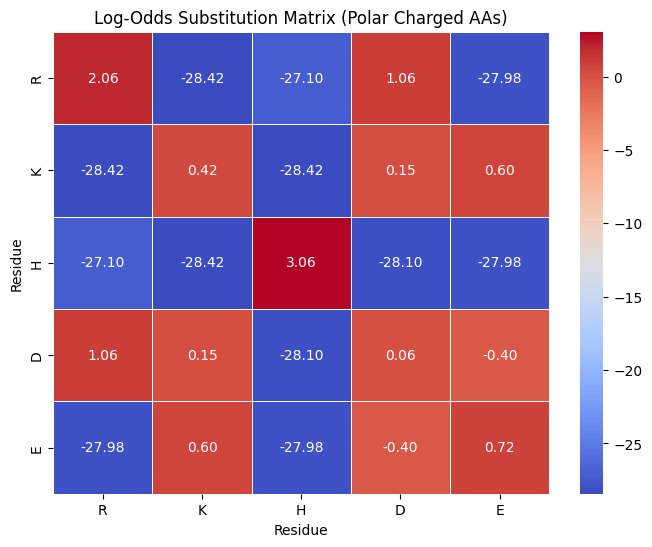

In [40]:
# Visualize the Matrix with a Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(log_odds_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Log-Odds Substitution Matrix (Polar Charged AAs)")
plt.xlabel("Residue")
plt.ylabel("Residue")
plt.show()


Final Output Example
A heatmap showing:

Positive scores (🔴 red): Substitutions that occur more often than expected → favored.

Negative scores (🔵 blue): Substitutions that occur less than expected → disfavored.

Count substitutions → raw matrix

Normalize to get substitution probabilities

Calculate log-odds from observed vs. expected

Visualize with heatmap